# Benchmark results reporting

## Setup

### Prerequirements
This notebook requires a kernel running Python 3.5+.
You can skip this section if the kernel is already configured.

In [ ]:
!pip install -r ./requirements.txt
#!pip install jupyter_contrib_nbextensions
#!jupyter contrib nbextension install --user
#!jupyter nbextension enable python-markdown/main
#!pip install jupyter_nbextensions_configurator
#!jupyter nbextensions_configurator enable --user

### Imports and selection of the results directory

In [1]:
import report
import report.config as config
from report import create_file, display

## Results

##### Parameters

In [2]:
%run ./reports_config.py

In [3]:
from report.config import *

#### Loading results, formatting and adding columns
- `result` is the raw result metric computed from predictions at the end the benchmark.
    For classification problems, it is usually `auc` for binomial classification and `logloss` for multinomial classification.
- `score` ensures a standard comparison between tasks: **higher is always better**.
- `norm_score` is a normalization of `score` on a `[0, 1]` scale, with `{{zero_one_refs[0]}}` score as `0` and `{{zero_one_refs[1]}}` score as `1`.
- `imp_result` and `imp_score` for imputed results/scores. Given a task and a framework:
    - if **all folds results/scores are missing**, then no imputation occurs, and the result is `nan` for each fold.
    - if **only some folds results/scores are missing**, then the missing result is imputed by the `{{impute_missing_with}}` result for this fold.

In [4]:
from report import prepare_results

# load result files
res = prepare_results(results_files,
                      renamings=renamed_frameworks,
                      exclusions=excluded_frameworks,
                      imputation=impute_missing_with,
                      normalization=zero_one_refs)
res.results.to_csv(create_file("tables", results_group, "all_results.csv"), 
                   index=False, 
                   float_format=config.ff)

### Tasks list

In [5]:
from report import render_metadata

# tasks = (res.results.groupby(['task', 'type'])['id']
#                     .unique()
#                     .map(lambda id: id[0]))
# display(tasks)

render_metadata(res.metadata, 
                filename=create_file("datasets", results_group, "metadata.csv"))

,task,name,type,dataset,nrows,nfeatures,nclasses,class_imbalance
18,openml.org/t/168868,APSFailure,binary,openml.org/d/41138,76000,171,2,54.272727
17,openml.org/t/34539,Amazon_employee_access,binary,openml.org/d/4135,32769,10,2,16.274117
0,openml.org/t/146818,Australian,binary,openml.org/d/40981,690,15,2,1.247557
21,openml.org/t/146825,Fashion-MNIST,multiclass,openml.org/d/40996,70000,785,10,1.000000
27,openml.org/t/3945,KDDCup09_appetency,binary,openml.org/d/1111,50000,231,2,55.179775
28,openml.org/t/168335,MiniBooNE,binary,openml.org/d/41150,130064,51,2,2.563495
16,openml.org/t/7592,adult,binary,openml.org/d/1590,48842,15,2,3.179173
35,openml.org/t/189354,airlines,binary,openml.org/d/1169,539383,8,2,1.244960
36,openml.org/t/189356,albert,binary,openml.org/d/41147,425240,79,2,1.000000
19,openml.org/t/14965,bank-marketing,binary,openml.org/d/1461,45211,17,2,7.548119


### Completed tasks/folds

In [6]:
done = (res.done.reset_index()
                .groupby(['task', 'framework'])['fold']
                .unique())
display(done, pretty=False)
# display(tabulate(done, tablefmt='plain'))

                                                                                    fold
task                                   framework                                        
adult                                  autosklearn        [0, 1, 5, 6, 8, 9, 3, 4, 7, 2]
                                       autoweka           [2, 3, 9, 5, 0, 1, 8, 4, 7, 6]
                                       constantpredictor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                                       h2oautoml          [9, 8, 4, 5, 3, 7, 6, 2, 1, 0]
                                       randomforest       [0, 1, 3, 4, 2, 5, 6, 7, 9, 8]
                                       tpot               [4, 3, 8, 9, 0, 2, 5, 6, 7, 1]
                                       tunedrandomforest  [0, 1, 2, 3, 4, 5, 6, 8, 9, 7]
airlines                               autosklearn        [1, 3, 2, 0, 4, 9, 6, 5, 7, 8]
                                       autoweka           [9, 5, 8, 7, 4, 6, 0, 3, 2, 1]
                     

### Missing or crashed/aborted tasks/folds

In [7]:
# not_done = pd.DataFrame([(task, framework) for task in res.tasks 
#                                            for framework in res.frameworks 
#                                            if (task, framework) not in done.index],
#                         columns=['task', 'framework'])
# missing = res.results.append(not_done)\
#                      .groupby(['task', 'framework'])['fold']\
#                      .unique()\
#                      .map(sorted_ints)\
#                      .map(lambda arr: sorted(list(set(range(0, nfolds)) - set(arr))))\
#                      .where(lambda values: values.map(lambda arr: len(arr) > 0))\
#                      .dropna()

missing = (res.missing.reset_index()
                      .groupby(['task', 'framework'])['fold']
                      .unique())
display(missing, pretty=False)

                                              fold
task   framework                                  
albert autosklearn                             [5]
robert autoweka     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Failing tasks/folds

In [8]:
# failed = res.results.where(np.isnan(all_results.result))\
#                     .groupby(['task', 'framework'])['fold']\
#                     .unique()\
#                     .map(sorted_ints)

failed = (res.failed.reset_index()
                    .groupby(['task', 'framework'])['fold']
                    .unique())
display(failed, pretty=False)

                                                          fold
task               framework                                  
albert             autosklearn                          [1, 7]
                   autoweka     [0, 1, 4, 3, 5, 2, 6, 7, 9, 8]
dionis             h2oautoml    [2, 0, 5, 8, 4, 7, 1, 3, 6, 9]
                   tpot         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fabert             tpot                                    [4]
helena             autoweka                                [8]
                   h2oautoml                               [8]
kddcup09_appetency tpot                                    [2]


### Results anomalies

In [9]:
from report.analysis import list_outliers

display(list_outliers('result', 
                      results=res.results,
#                       results=res.results.loc[res.results.framework=='h2oautoml']
                      z_threshold=2.5,
                     ))

## Data reports

### Results summary

Averaging using arithmetic mean over fold `result` or `score`.
In following summaries, if not mentioned otherwise, the means are computed over imputed results/scores.
Given a task and a framework:
- if **all folds results/scores are missing**, then no imputation occured, and the mean result is `nan`.
- if **only some folds results/scores are missing**, then the amount of imputed results that contributed to the mean are displayed between parenthesis.

In [10]:
from report import render_summary

summary_results = res.results

#### Number of models trained

When available, displays the average amount of models trained by the framework for each dataset.

This amount should be interpreted differently for each framework.
For example, with *RandomForest*, this amount corresponds to the number of trees.

In [11]:
render_summary('models', 
               results=summary_results, 
               filename="models_summary.csv", 
               float_format="%.f")

#### Results mean

In [12]:
render_summary('result', 
               results=summary_results)

In [13]:
render_summary('imp_result', 
               results=summary_results,
               filename="result_summary.csv")

#### Score mean

In [14]:
render_summary('imp_score', 
               results=summary_results,
               filename="score_summary.csv")

In [15]:
render_summary('norm_score', 
               results=summary_results,
               filename="norm_score_summary.csv")

### Tasks leaderboard

In [16]:
from report import render_leaderboard

leaderboard_results = res.results.loc[~res.results.framework.isin(['constantpredictor', 'randomforest'])]

In [17]:
render_leaderboard('imp_score', 
                   results=leaderboard_results,
                   aggregate=True, 
                   show_imputations=True, 
                   filename="tasks_leaderboard.csv")

### Folds leaderboard

In [18]:
render_leaderboard('score', 
                   results=res.results,
                   filename="folds_leaderboard.csv");

## Visualizations

### Heatmaps

In [19]:
from report import draw_score_heatmap

# heatmap_results = res.results.loc[~res.results.framework.isin(['constantpredictor', 'randomforest'])]
heatmap_results = res.results.loc[~res.results.framework.isin(['constantpredictor'])]

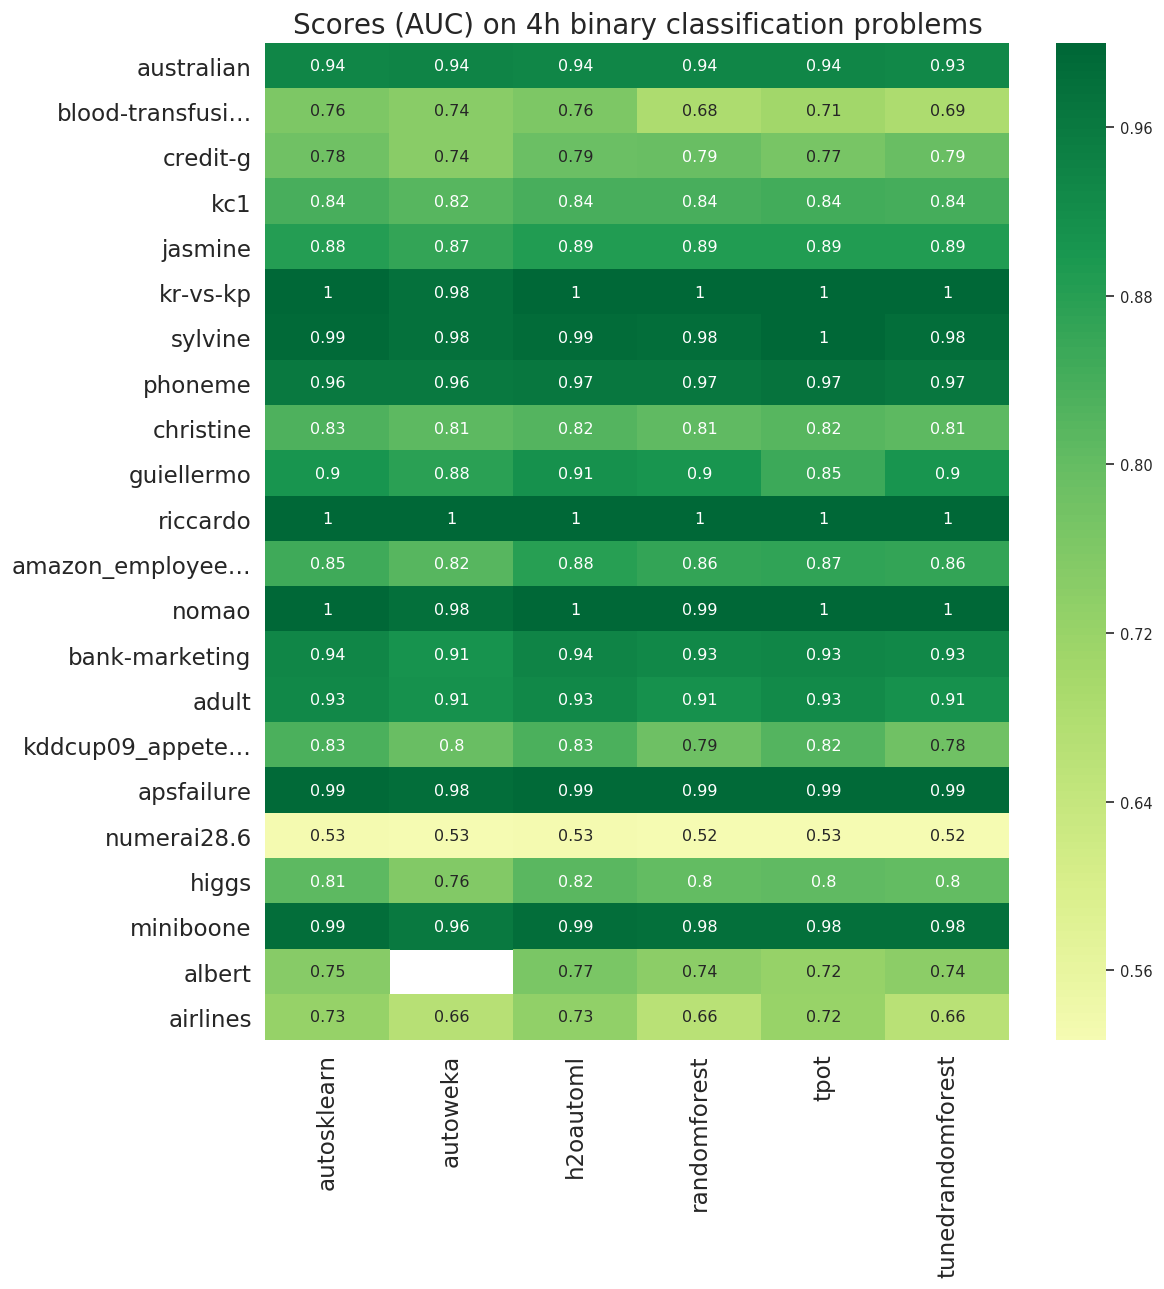

In [20]:
draw_score_heatmap('imp_score',
                   results=heatmap_results,
                   type_filter='binary', 
                   metadata=res.metadata,
                   y_sort_by=tasks_sort_by,
                   title=f"Scores ({binary_score_label}) on {results_group} binary classification problems",
                   filename="binary_score_heat.png",
                   center=0.5);

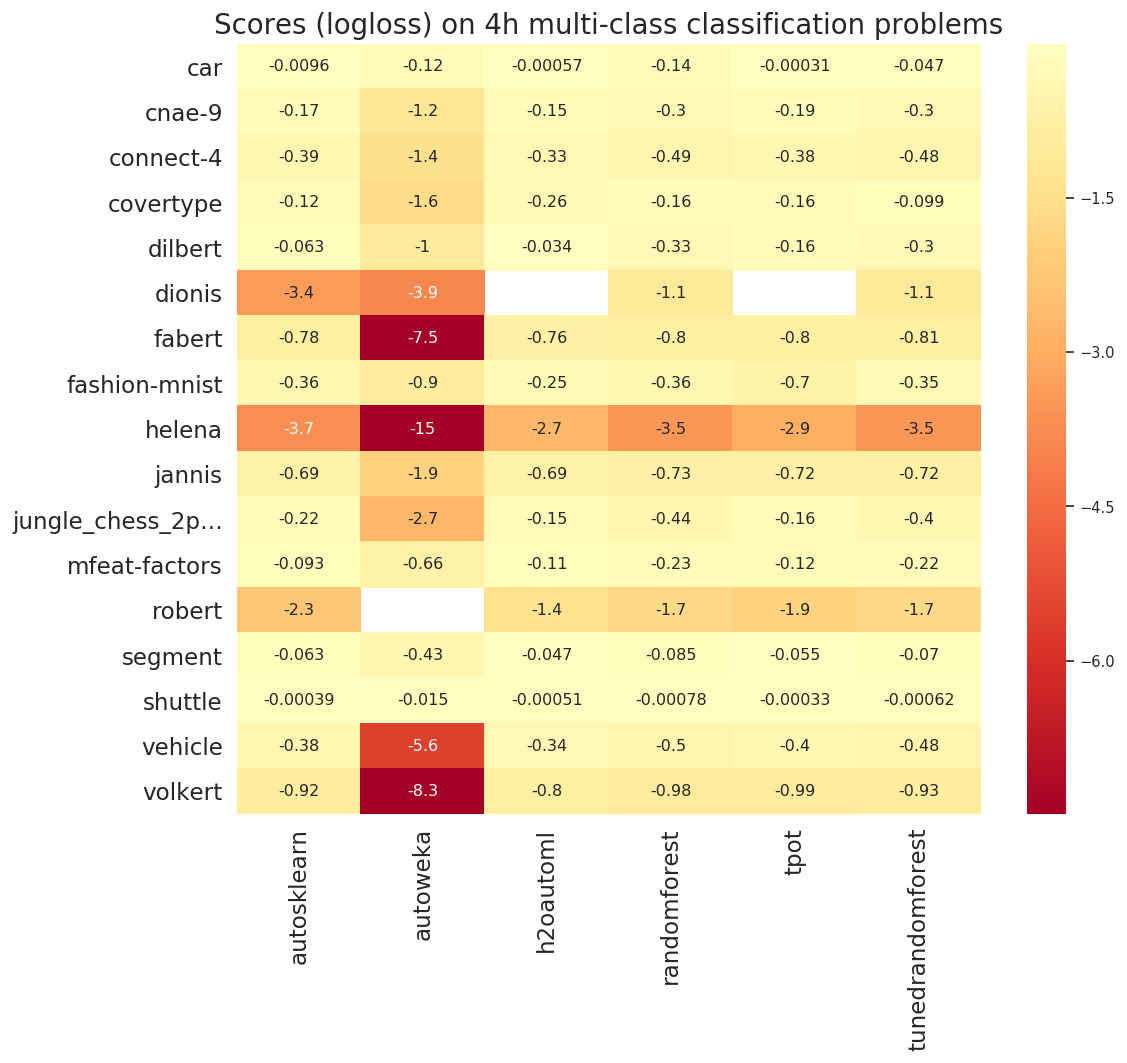

In [21]:
draw_score_heatmap('imp_score', 
                   results=heatmap_results,
                   type_filter='multiclass', 
                   y_sort_by=tasks_sort_by,
                   title=f"Scores ({multiclass_score_label}) on {results_group} multi-class classification problems",
                   filename="multiclass_score_heat.png",
                   center=0);

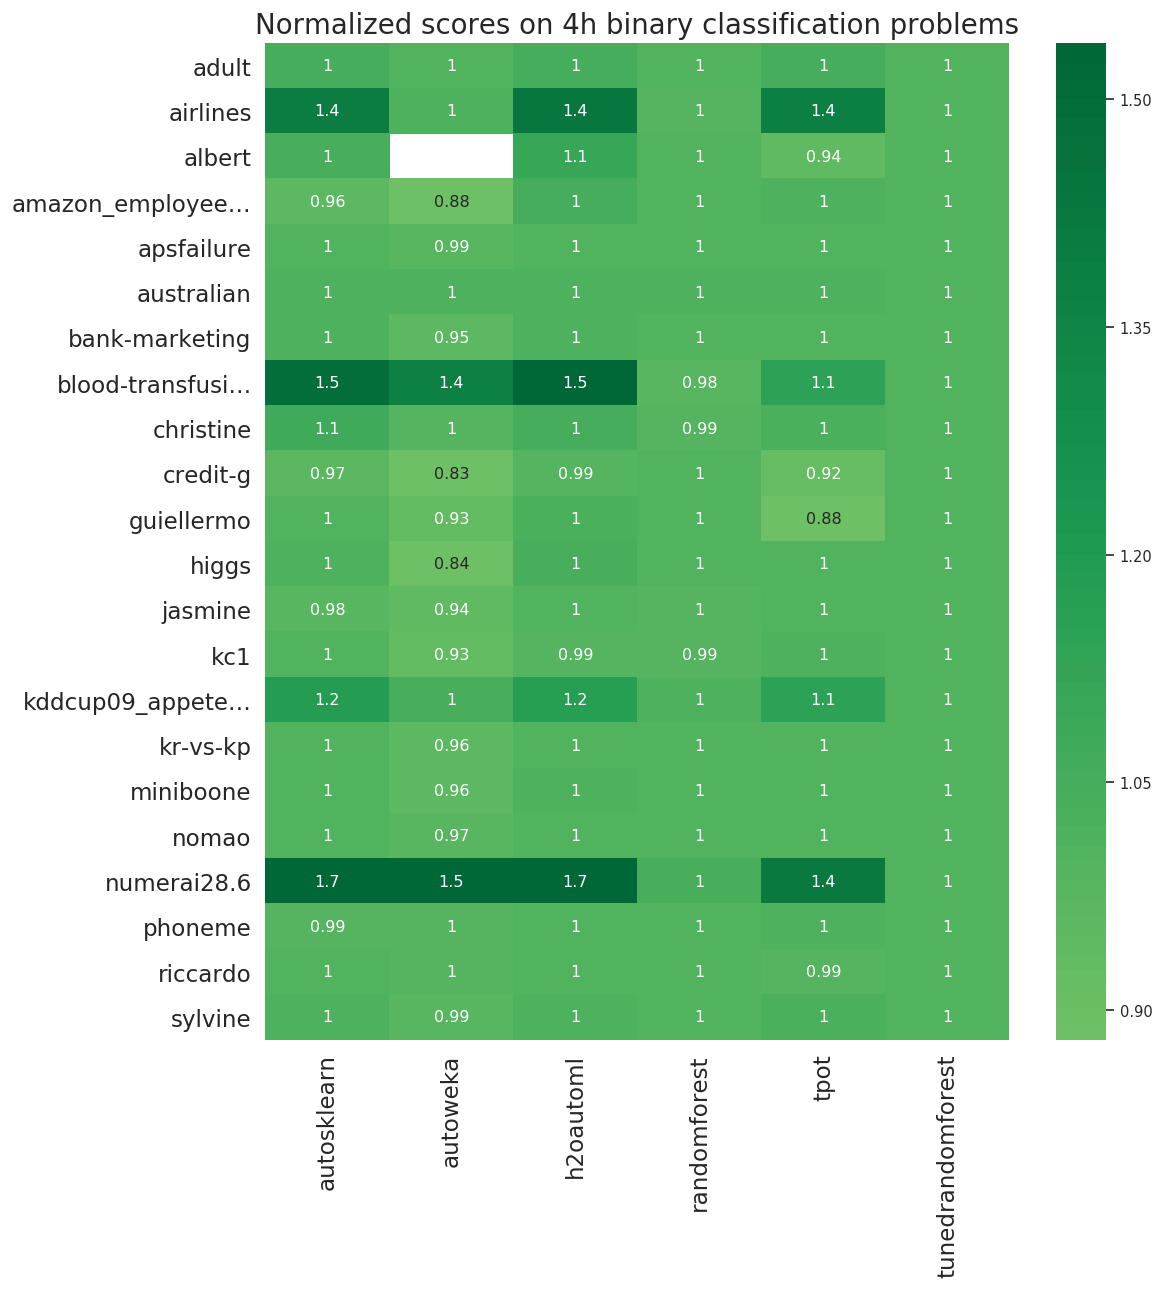

In [22]:
draw_score_heatmap('norm_score', 
                   results=heatmap_results,
                   type_filter='binary', 
                   y_sort_by=tasks_sort_by,
                   title=f"Normalized scores on {results_group} binary classification problems",
                   filename="binary_norm_score_heat.png",
                   center=0);

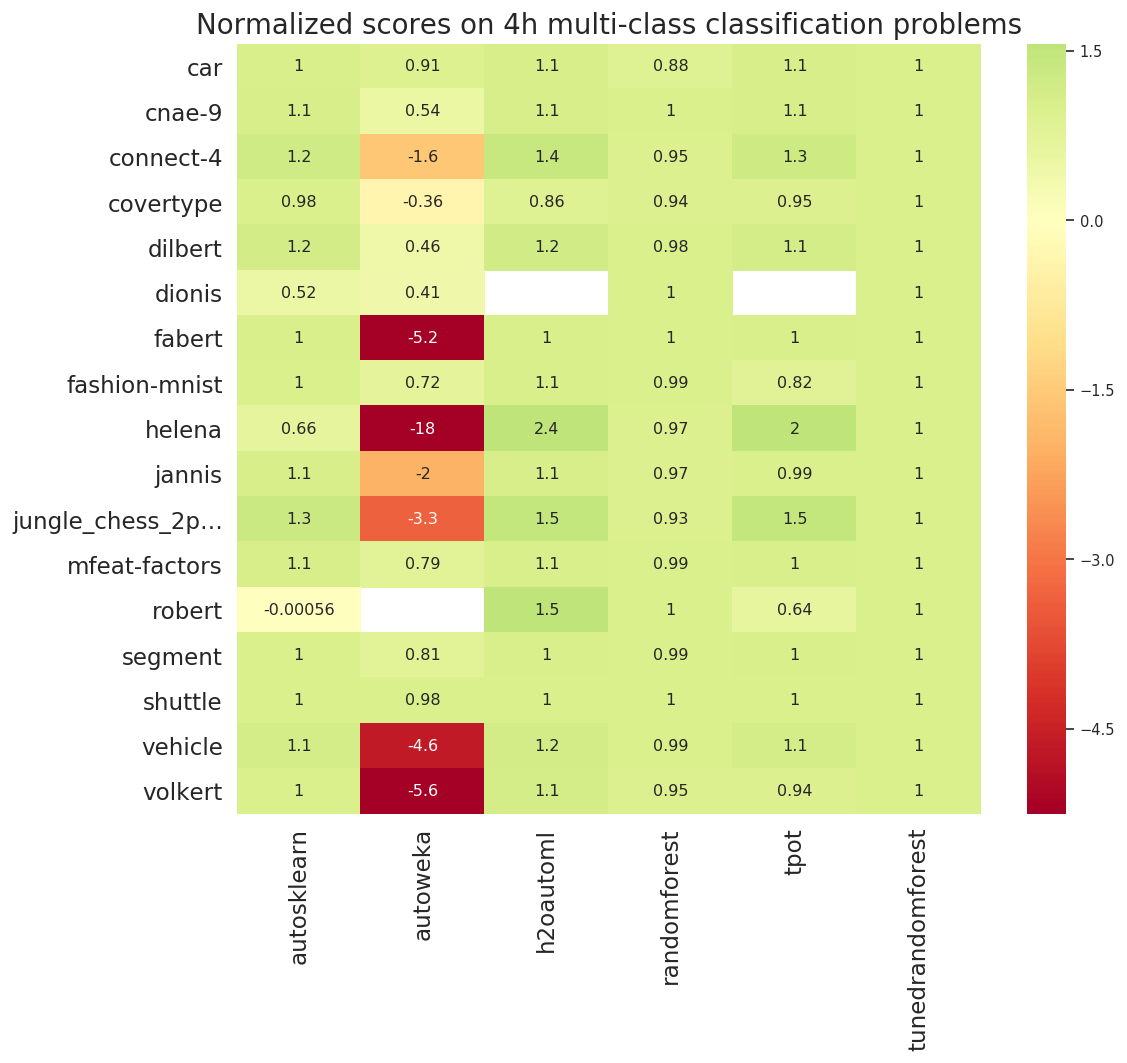

In [23]:
draw_score_heatmap('norm_score',
                   results=heatmap_results,
                   type_filter='multiclass', 
                   y_sort_by=tasks_sort_by,
                   title=f"Normalized scores on {results_group} multi-class classification problems",
                   filename="multiclass_norm_score_heat.png",
                   center=0);

### Linear plots

In [24]:
from report import draw_score_parallel_coord

# parallel_coord_results = res.results.loc[~res.results.framework.isin(['randomforest'])]
parallel_coord_results = res.results

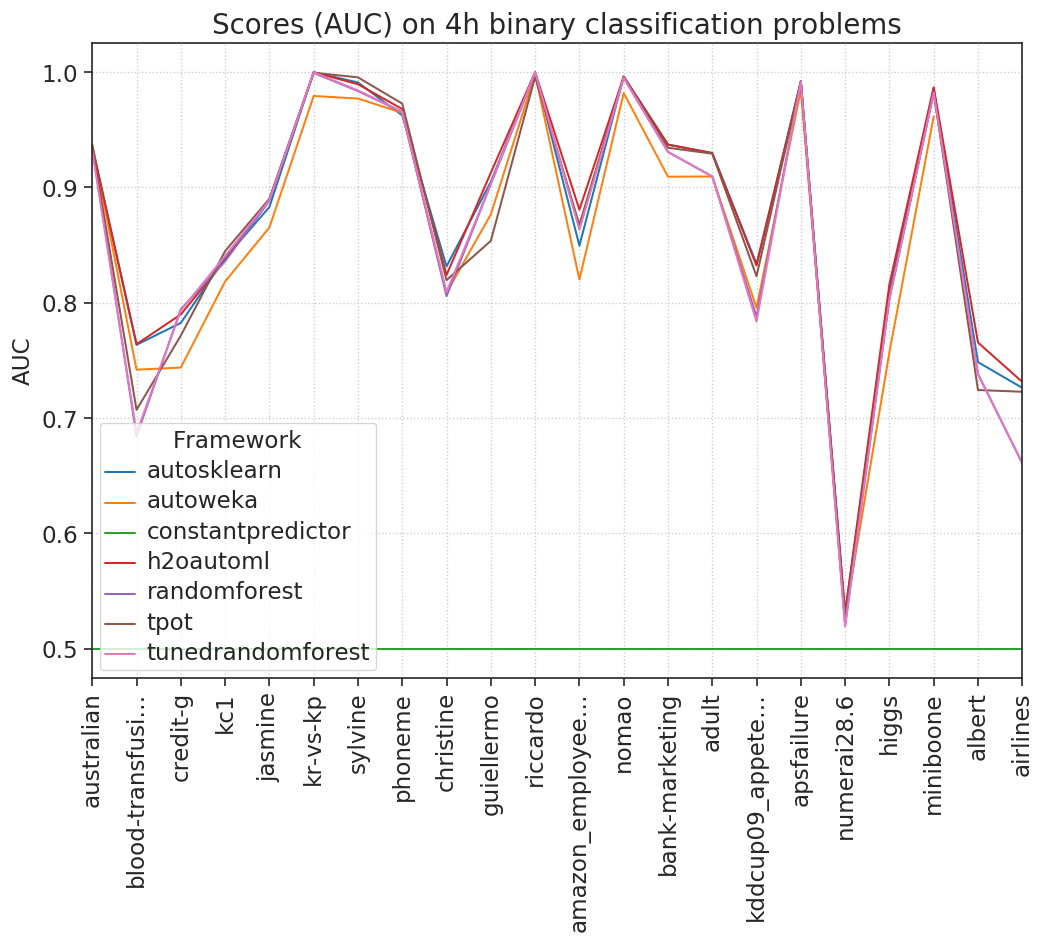

In [25]:
draw_score_parallel_coord('imp_score',
                          results=parallel_coord_results,
                          type_filter='binary', 
                          metadata=res.metadata,
                          x_sort_by=tasks_sort_by,
                          title=f"Scores ({binary_score_label}) on {results_group} binary classification problems",
                          ylabel=binary_score_label,
                          legend_loc='lower left',
                          filename="binary_score_parallel_ccord.png"
                         );


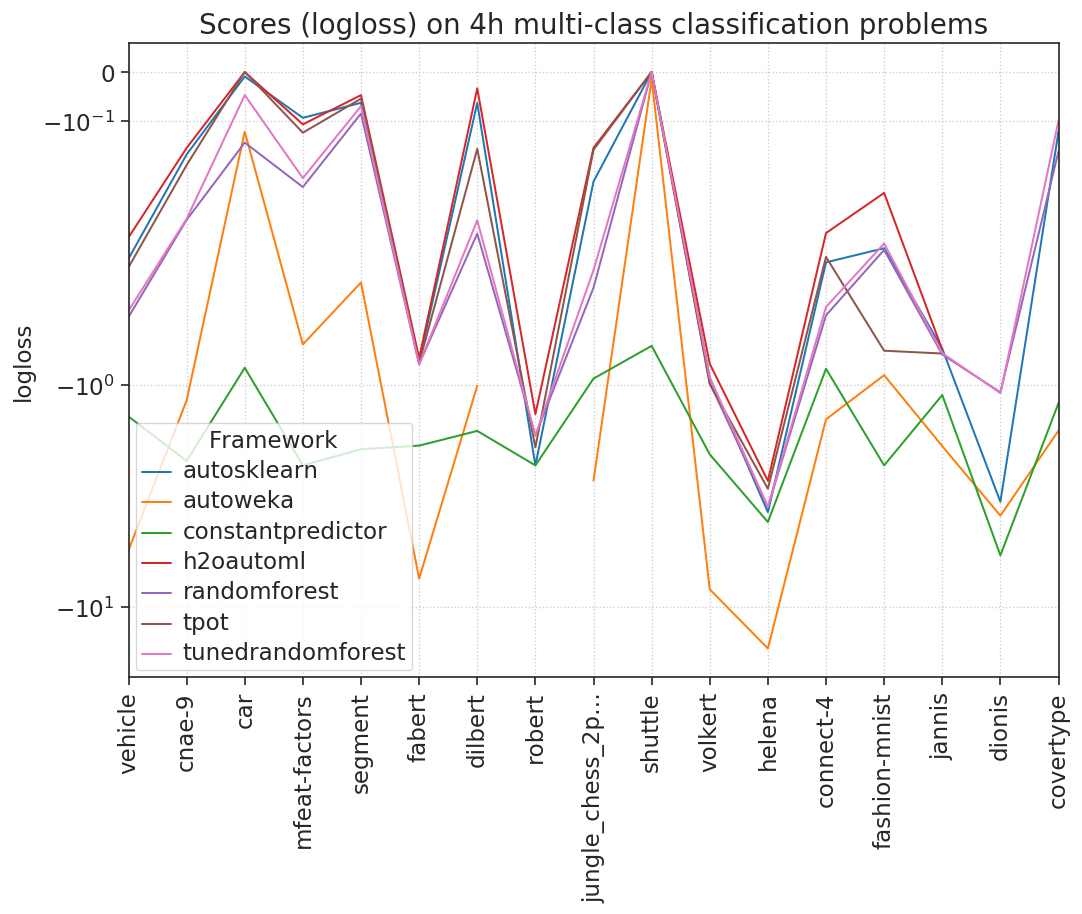

In [26]:
draw_score_parallel_coord('imp_score',
                          results=parallel_coord_results,
                          type_filter='multiclass',
                          metadata=res.metadata,
                          x_sort_by=tasks_sort_by,
                          title=f"Scores ({multiclass_score_label}) on {results_group} multi-class classification problems",
                          ylabel=multiclass_score_label,
                          yscale=('symlog', dict(linthreshy=0.5)),
                          legend_loc='lower left',
                          filename="multiclass_score_parallel_ccord.png"
                         );


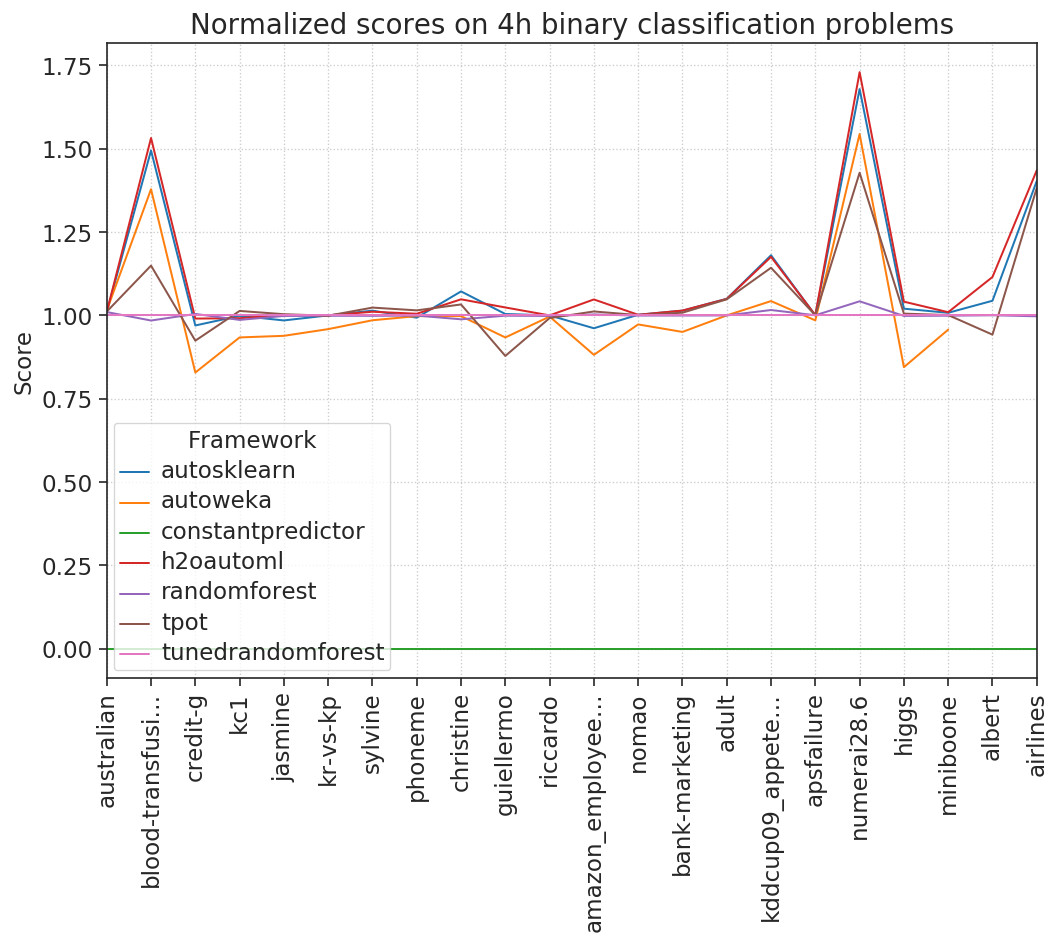

In [27]:
draw_score_parallel_coord('norm_score', 
                          results=parallel_coord_results,
                          type_filter='binary', 
                          metadata=res.metadata,
                          x_sort_by=tasks_sort_by,
                          title=f"Normalized scores on {results_group} binary classification problems",
                          legend_loc='lower left',
                          filename="binary_norm_score_parallel_ccord.png"
                         );


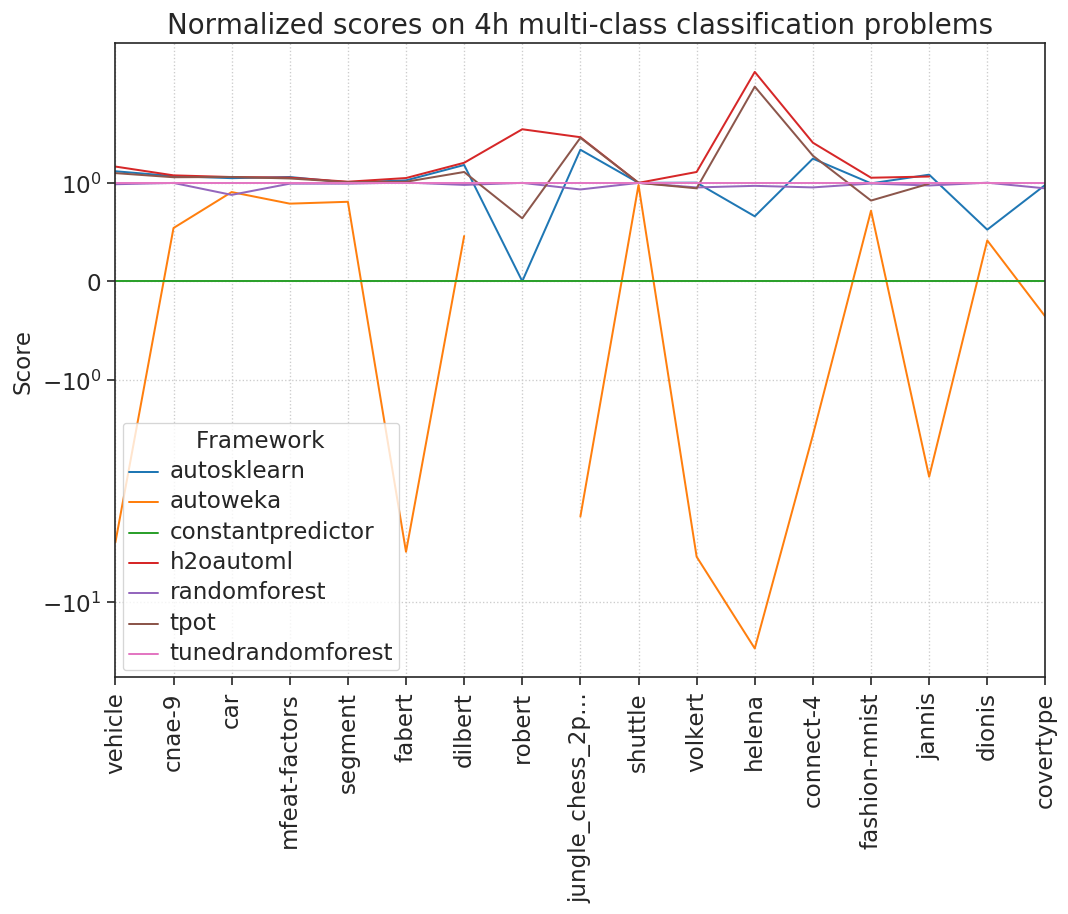

In [28]:
draw_score_parallel_coord('norm_score', 
                          results=parallel_coord_results,
                          type_filter='multiclass',
                          metadata=res.metadata,
                          x_sort_by=tasks_sort_by,
                          title=f"Normalized scores on {results_group} multi-class classification problems",
                          filename="multiclass_norm_score_parallel_ccord.png", 
                          yscale='symlog',
                         );


### Scatterplots

In [29]:
from report import draw_score_stripplot

# scatterplot_results = (res.results.loc[~res.results.framework.isin(['randomforest'])]
#                                   .sort_values(by=['framework']))  # sorting for colors consistency
scatterplot_results = res.results.sort_values(by=['framework'])  # sorting for colors consistency

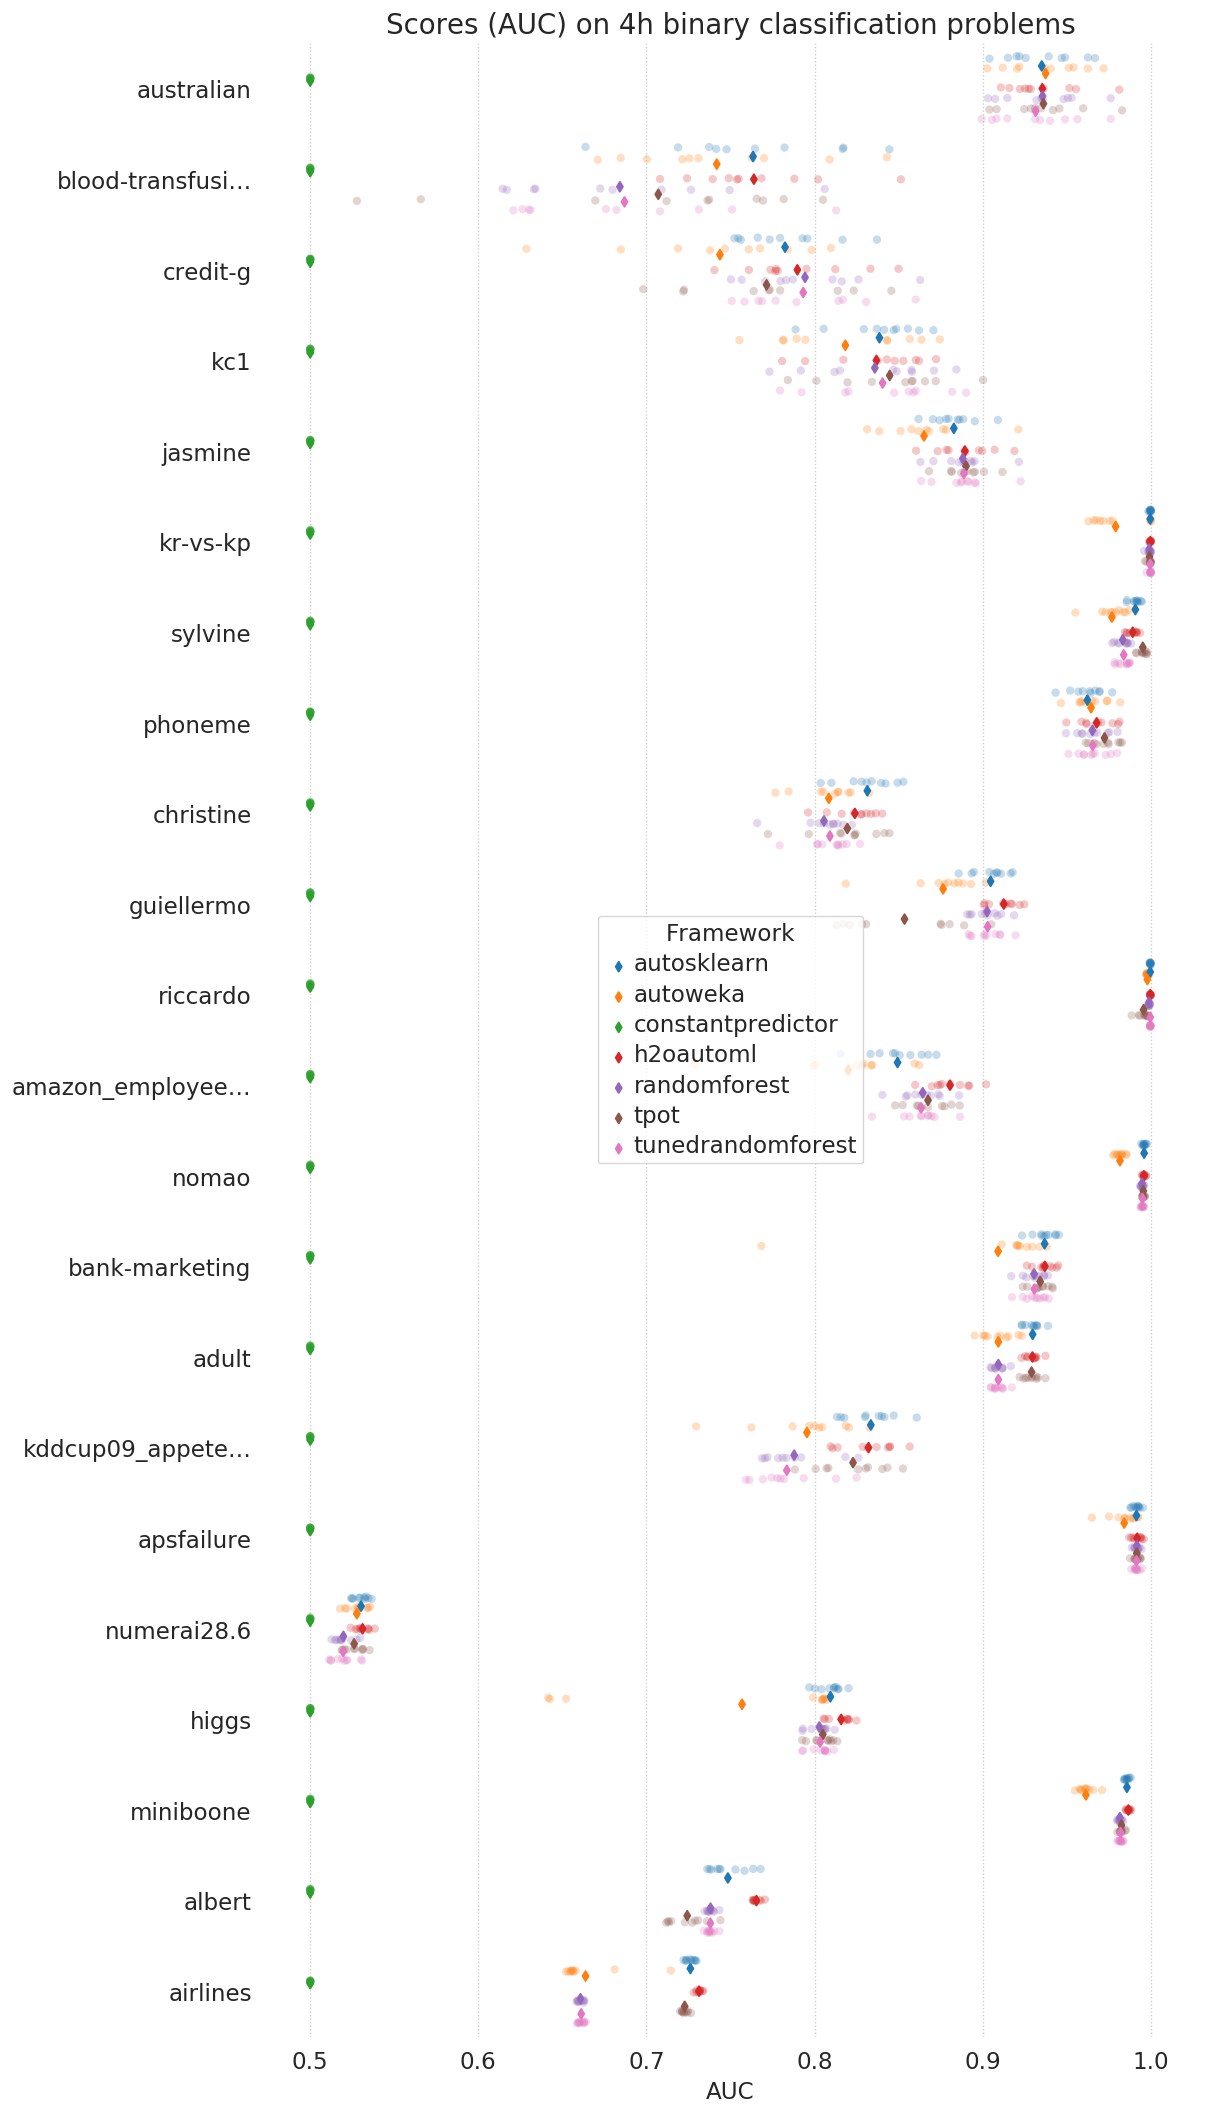

In [30]:
draw_score_stripplot('imp_result', 
                     results=scatterplot_results,
                     type_filter='binary', 
                     metadata=res.metadata,
                     y_sort_by=tasks_sort_by,
                     title=f"Scores ({binary_score_label}) on {results_group} binary classification problems",
                     xlabel=binary_score_label,
                     filename="binary_results_stripplot.png");

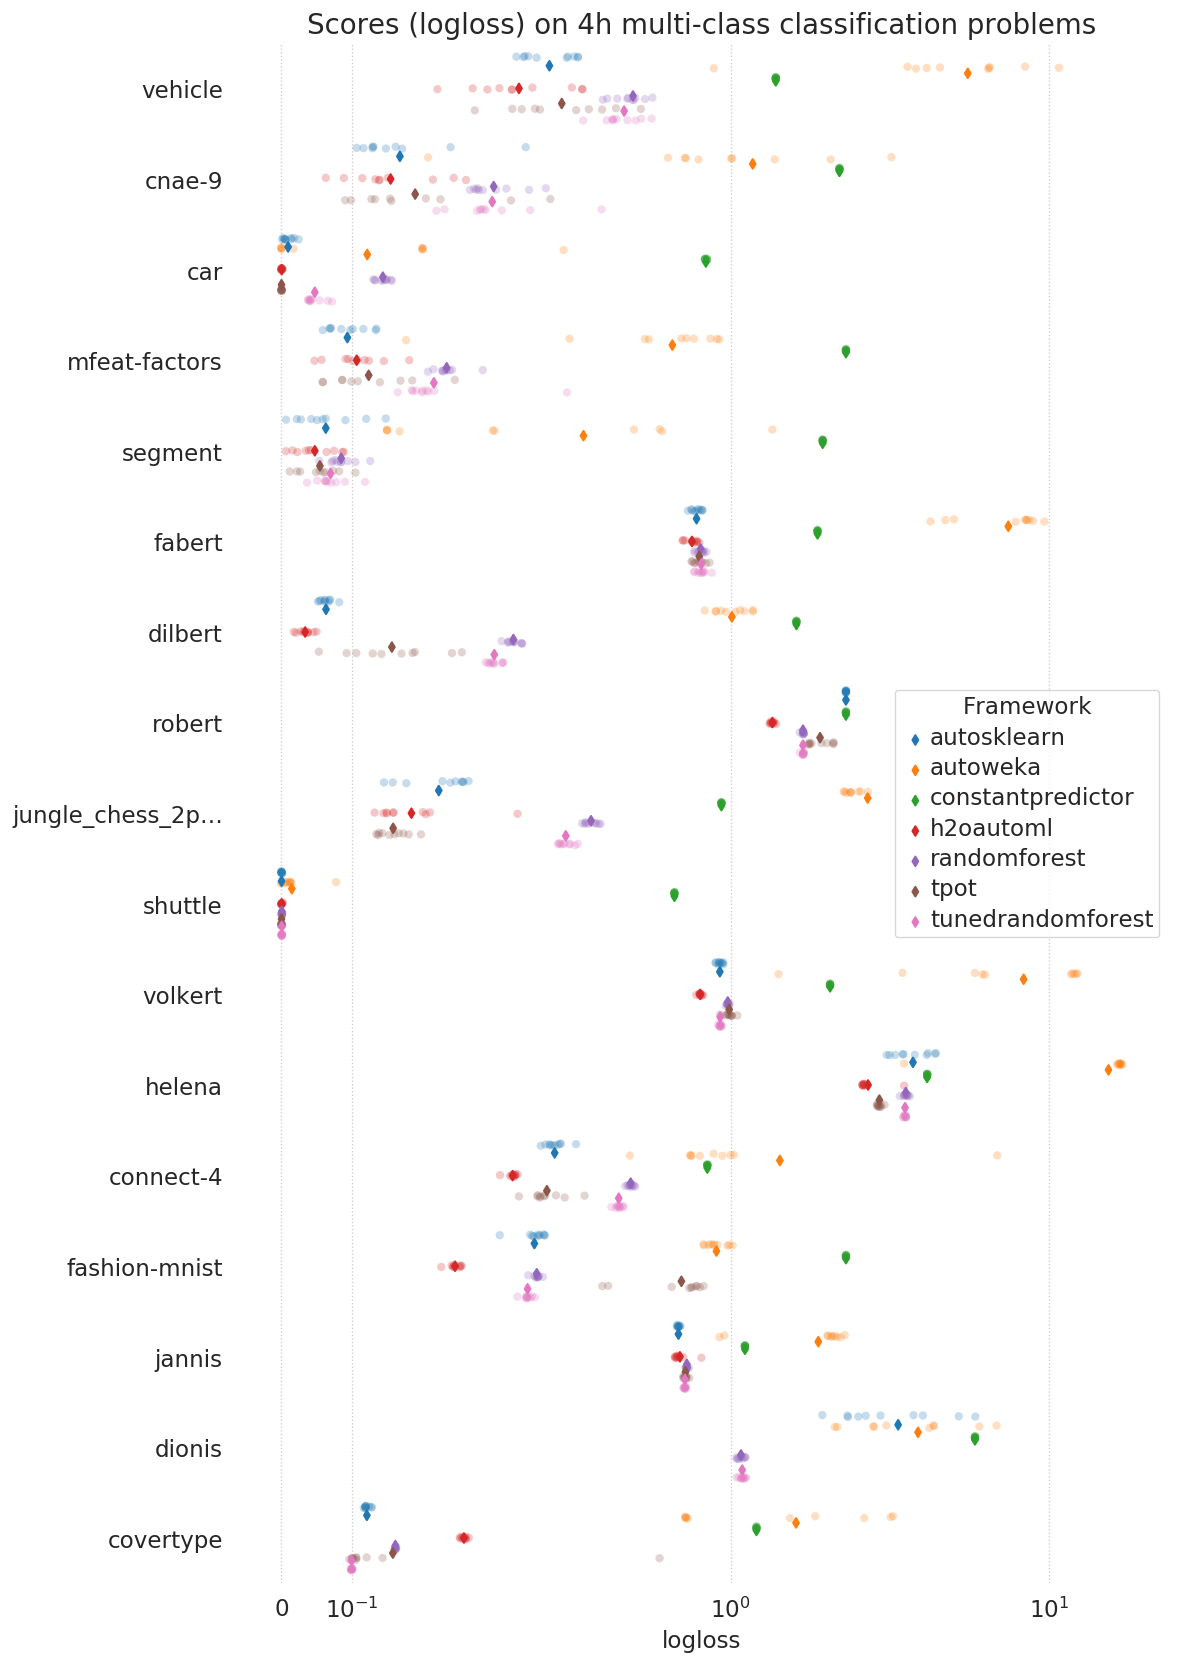

In [31]:
draw_score_stripplot('imp_result',
                     results=scatterplot_results,
                     type_filter='multiclass', 
                     metadata=res.metadata,
                     y_sort_by=tasks_sort_by,
#                      xbound=(0,10),
                     xscale=('symlog', dict(linthreshx=0.5)),
                     title=f"Scores ({multiclass_score_label}) on {results_group} multi-class classification problems",
                     xlabel=multiclass_score_label, 
                     filename="multiclass_results_stripplot.png");

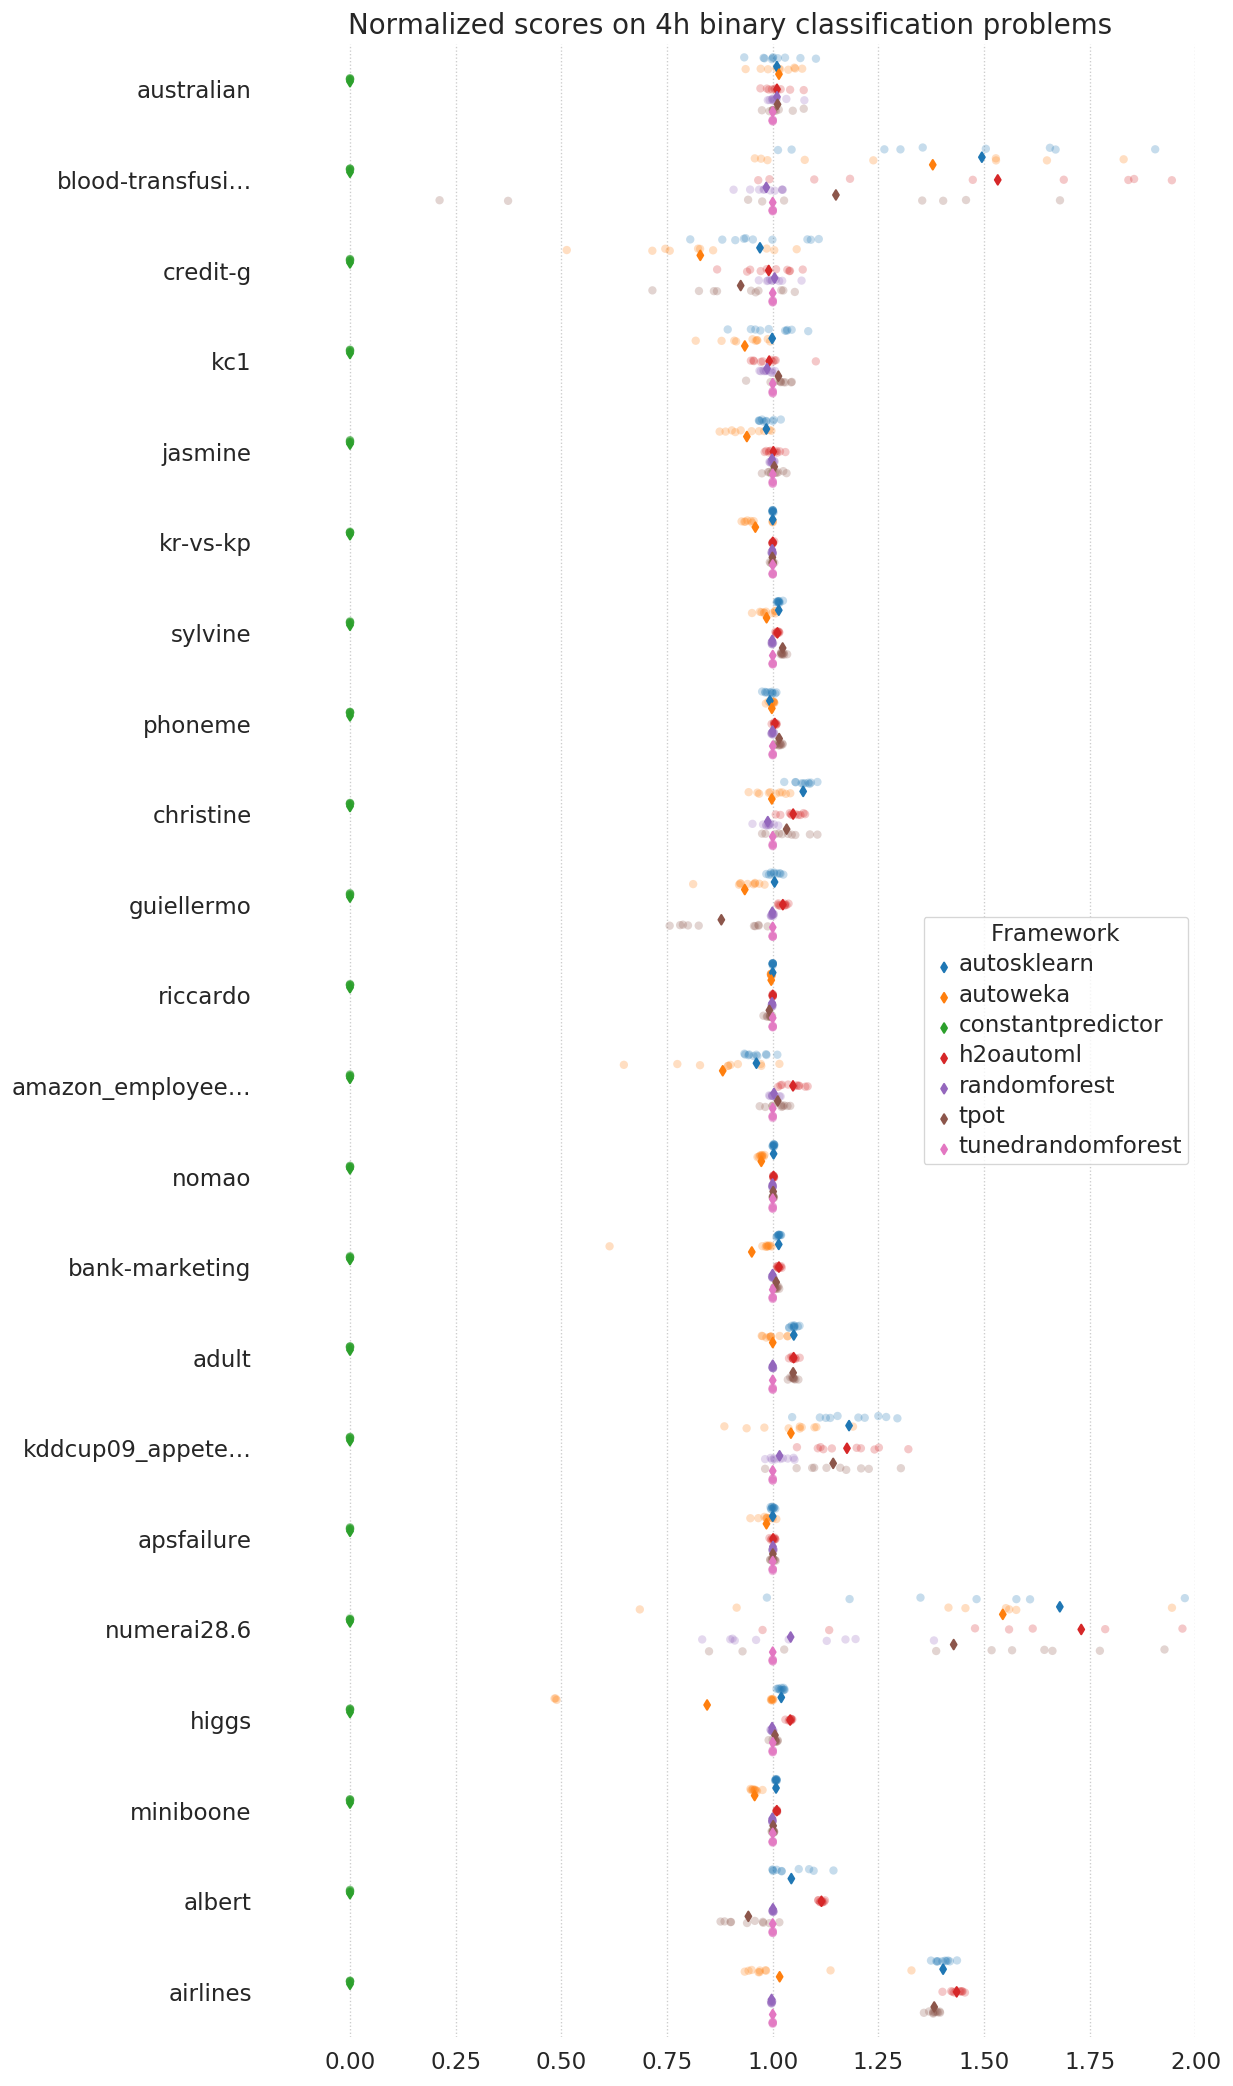

In [32]:
draw_score_stripplot('norm_score', 
                     results=scatterplot_results,
                     type_filter='binary', 
                     metadata=res.metadata,
                     y_sort_by=tasks_sort_by,
                     xbound=(-0.2, 2),
                     xscale='linear',
                     title=f"Normalized scores on {results_group} binary classification problems",
                     filename="binary_norm_score_stripplot.png");

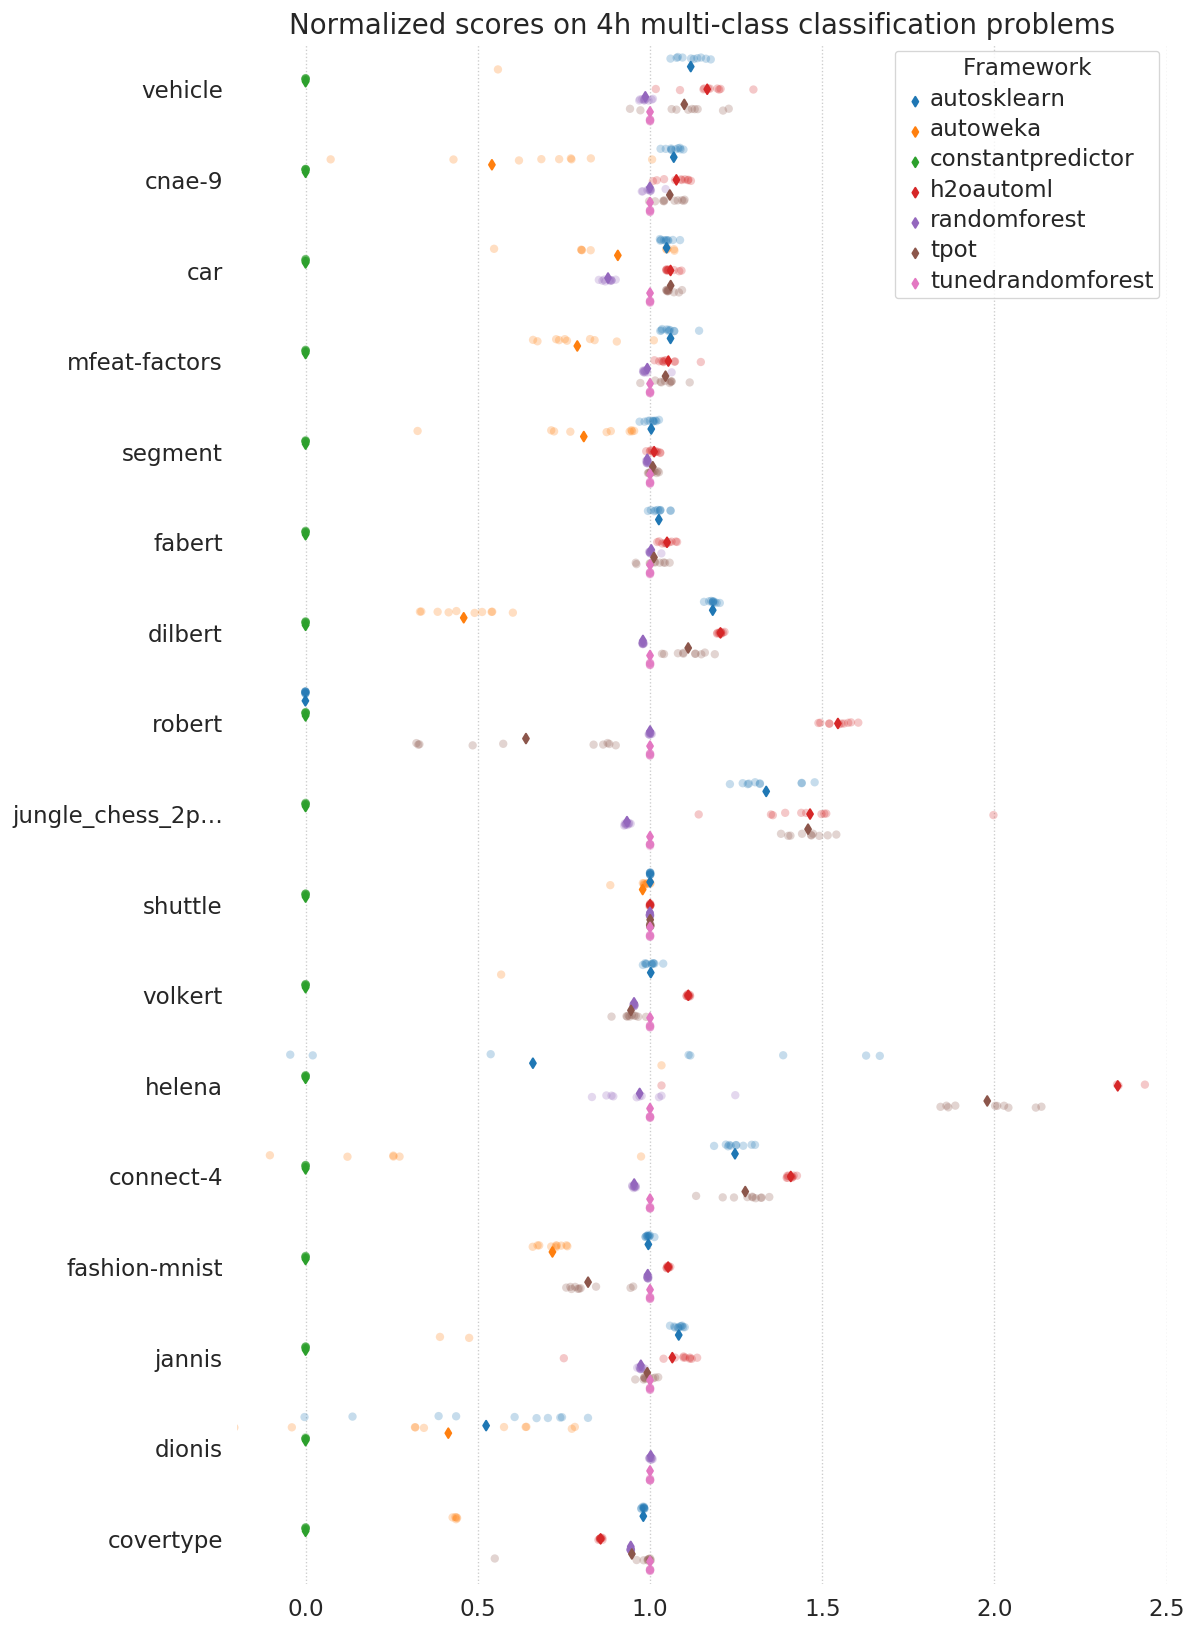

In [33]:
draw_score_stripplot('norm_score', 
                     results=scatterplot_results,
                     type_filter='multiclass', 
                     metadata=res.metadata,
                     y_sort_by=tasks_sort_by,
                     xbound=(-0.2, 2.5),
                     xscale='linear',
                     title=f"Normalized scores on {results_group} multi-class classification problems",
                     filename="multiclass_norm_score_stripplot.png");

## Playground

In [ ]:
res.results.loc[(res.results.task.str.contains('jungle'))&(res.results.framework=='tunedrandomforest')];

In [ ]:
done.iloc[done.index.get_level_values('framework').isin(['autosklearn', 'h2oautoml', 'tpot'])]\
    .apply(sorted_ints);

In [ ]:
failures = res.failed.groupby(['task', 'fold', 'framework'])['info']\
                     .unique()
#display(failures)

In [ ]:
h2o_res = (res.results.loc[(res.results.framework=='h2oautoml')&(res.results.fold==0)]
                     [['task', 'result', 'acc']])
# display(h2o_res, pretty=False, tab_format='grid')
display(h2o_res)